In [1207]:
import pandas as pd
import numpy as np
from dateutil import parser

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Loading and Getting a Glimpse of Dataset

In [1208]:
data = pd.read_excel(r'D:\Code\py_code\Multi-Layer-Perceptron\data\BA_AirlineReviews_CL_excel.xlsx',header=0)

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [1209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

# Preprocessing Data

**Handling Datetime**

In [1210]:
# data['Datetime'] = data['Datetime'].apply(lambda x: parser.parse(x))

# data['Year_Datetime'] = data['Datetime'].dt.year
# data['Month_Datetime'] = data['Datetime'].dt.month
# data['Day_Datetime'] = data['Datetime'].dt.day
# data = data.drop(columns=['Datetime'])

# data.head()

**Handling DateFlown**

In [1211]:
# data['Year_DateFlown'] = data['DateFlown'].dt.year
# data['Month_DateFlown'] = data['DateFlown'].dt.month
# data['Day_DateFlown'] = data['DateFlown'].dt.day
# data = data.drop(columns=['DateFlown'])

# data.head()

**Checking missing value**

In [1212]:
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

**Replace Missing Value**

1. Missing Value Numerical Data

In [1213]:
numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object') & (data.columns != 'DateFlown')].to_list()
numeric_missing_col

['SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity']

In [1214]:

impNumeric = KNNImputer(n_neighbors=5)
for col in numeric_missing_col:
    numeric = data[[col]].values
    impNumeric = impNumeric.fit(numeric)
    numeric = impNumeric.transform(numeric)
    numeric = numeric.round()
    data[col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

2. Missing Value Nominal Data

In [1215]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
nominal_missing_col.append('DateFlown')
nominal_missing_col

['TypeOfTraveller', 'SeatType', 'Route', 'Aircraft', 'DateFlown']

In [1216]:
nominal = data[nominal_missing_col].values

impNominal = SimpleImputer(strategy='constant', fill_value='unknown')
impNominal = impNominal.fit(nominal)
nominal = impNominal.transform(nominal)
data[nominal_missing_col] = nominal

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

**Removing Unwanted Feature**

In [1217]:
data.drop(['id', 'Name', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft'], inplace=True, axis = 1)
data.head()
data.isnull().sum()

Satisfaction             0
Datetime                 0
VerifiedReview           0
TypeOfTraveller          0
SeatType                 0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

**Features & Label Encoding**

1. Categorical Features Encoding

In [1218]:
encoder = OneHotEncoder(sparse_output=False)

categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

data.head()
data.isnull().sum()

Satisfaction                      0
Datetime                          0
VerifiedReview                    0
DateFlown                         0
SeatComfort                       0
CabinStaffService                 0
GroundService                     0
ValueForMoney                     0
Recommended                       0
Food&Beverages                    0
InflightEntertainment             0
Wifi&Connectivity                 0
TypeOfTraveller_Business          0
TypeOfTraveller_Couple Leisure    0
TypeOfTraveller_Family Leisure    0
TypeOfTraveller_Solo Leisure      0
TypeOfTraveller_unknown           0
SeatType_Business Class           0
SeatType_Economy Class            0
SeatType_First Class              0
SeatType_Premium Economy          0
SeatType_unknown                  0
dtype: int64

2. Binary Features Encoding

In [1219]:
lbenc = LabelEncoder()

for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

data.head()
data.isnull().sum()

Satisfaction                      0
Datetime                          0
VerifiedReview                    0
DateFlown                         0
SeatComfort                       0
CabinStaffService                 0
GroundService                     0
ValueForMoney                     0
Recommended                       0
Food&Beverages                    0
InflightEntertainment             0
Wifi&Connectivity                 0
TypeOfTraveller_Business          0
TypeOfTraveller_Couple Leisure    0
TypeOfTraveller_Family Leisure    0
TypeOfTraveller_Solo Leisure      0
TypeOfTraveller_unknown           0
SeatType_Business Class           0
SeatType_Economy Class            0
SeatType_First Class              0
SeatType_Premium Economy          0
SeatType_unknown                  0
dtype: int64

3. Label Encoding

In [1220]:
satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate",
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()
data.isnull().sum()

Satisfaction                      0
Datetime                          0
VerifiedReview                    0
DateFlown                         0
SeatComfort                       0
CabinStaffService                 0
GroundService                     0
ValueForMoney                     0
Recommended                       0
Food&Beverages                    0
InflightEntertainment             0
Wifi&Connectivity                 0
TypeOfTraveller_Business          0
TypeOfTraveller_Couple Leisure    0
TypeOfTraveller_Family Leisure    0
TypeOfTraveller_Solo Leisure      0
TypeOfTraveller_unknown           0
SeatType_Business Class           0
SeatType_Economy Class            0
SeatType_First Class              0
SeatType_Premium Economy          0
SeatType_unknown                  0
dtype: int64

**Splitting the Data**

In [1221]:
features = data.values[:, 1:]
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=42, stratify=data['Satisfaction'], shuffle=True)

In [1222]:
# smt = SMOTE()

# x_train, y_train = smt.fit_resample(x_train, y_train)
# x_test, y_test = smt.fit_resample(x_test, y_test)

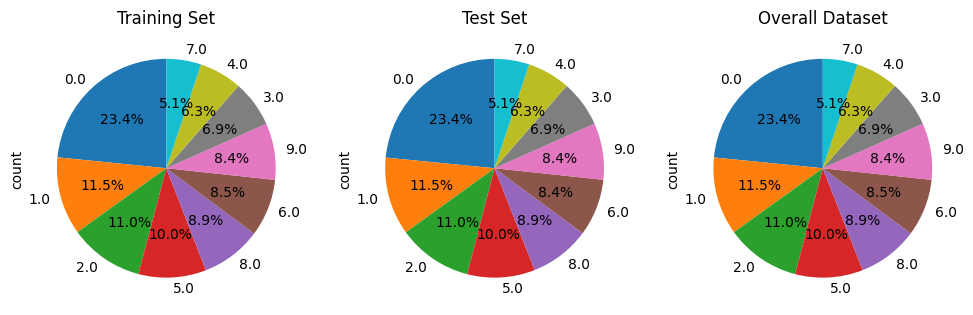

In [1223]:
s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

# Create a pie chart for the overall dataset
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Training Set')
s_train['Satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 2)
plt.title('Test Set')
s_test['Satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 3)
plt.title('Overall Dataset')
data['Satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.show()


**Features Scaling**

In [1224]:
scaler = StandardScaler()
scaler.fit(features)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [1225]:
col = data.columns.to_list()
col.remove('Satisfaction')

x_train = pd.DataFrame(x_train, columns=col)
x_test = pd.DataFrame(x_test, columns=col)

# Feature Selection

,Datetime,VerifiedReview,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_unknown
Datetime,1.000000,0.036155,0.002407,0.033019,-0.021094,-0.009333,0.013973,-0.010095,0.002278,0.001041,...,0.018503,-0.010241,0.026864,-0.003030,-0.022890,-0.036364,0.020288,0.008095,0.019403,-0.020529
VerifiedReview,0.036155,1.000000,0.146231,-0.060592,-0.045706,-0.048202,-0.095571,-0.081044,0.008552,0.070602,...,0.077706,0.043317,0.058301,0.178598,-0.353053,0.020718,0.022286,-0.057312,-0.025238,-0.016172
DateFlown,0.002407,0.146231,1.000000,0.050916,0.063278,-0.055808,0.068596,0.066749,0.094403,-0.016783,...,-0.179395,-0.211848,-0.110310,-0.206828,0.701388,0.071233,-0.040448,0.000874,-0.044621,-0.031998
SeatComfort,0.033019,-0.060592,0.050916,1.000000,0.613065,0.478298,0.683989,0.655011,0.581746,0.463741,...,-0.133077,-0.071887,-0.019905,0.085375,0.126561,0.021197,-0.106987,0.152893,0.030903,-0.032341
CabinStaffService,-0.021094,-0.045706,0.063278,0.613065,1.000000,0.463448,0.649277,0.657046,0.660545,0.369988,...,-0.145609,-0.048304,-0.012475,0.067211,0.125988,0.111667,-0.138238,0.097009,-0.021414,0.012469
GroundService,-0.009333,-0.048202,-0.055808,0.478298,0.463448,1.000000,0.590021,0.553329,0.380810,0.249060,...,-0.148049,-0.015574,-0.014885,0.103088,0.056037,0.073976,-0.101515,0.032971,0.032809,-0.033897
ValueForMoney,0.013973,-0.095571,0.068596,0.683989,0.649277,0.590021,1.000000,0.803380,0.638749,0.403094,...,-0.194993,-0.075901,-0.040602,0.083018,0.206417,0.042096,-0.068237,0.057280,0.006025,-0.026836
Recommended,-0.010095,-0.081044,0.066749,0.655011,0.657046,0.553329,0.803380,1.000000,0.657007,0.386118,...,-0.185215,-0.068066,-0.019963,0.072341,0.184570,0.085305,-0.102353,0.038865,0.009385,-0.019138
Food&Beverages,0.002278,0.008552,0.094403,0.581746,0.660545,0.380810,0.638749,0.657007,1.000000,0.454650,...,-0.131042,-0.057194,-0.035401,0.066229,0.140529,0.119465,-0.146995,0.092652,-0.014594,0.004874
InflightEntertainment,0.001041,0.070602,-0.016783,0.463741,0.369988,0.249060,0.403094,0.386118,0.454650,1.000000,...,-0.080460,0.036725,0.016366,0.073711,-0.056323,0.024743,-0.040232,0.057812,-0.016290,-0.014716


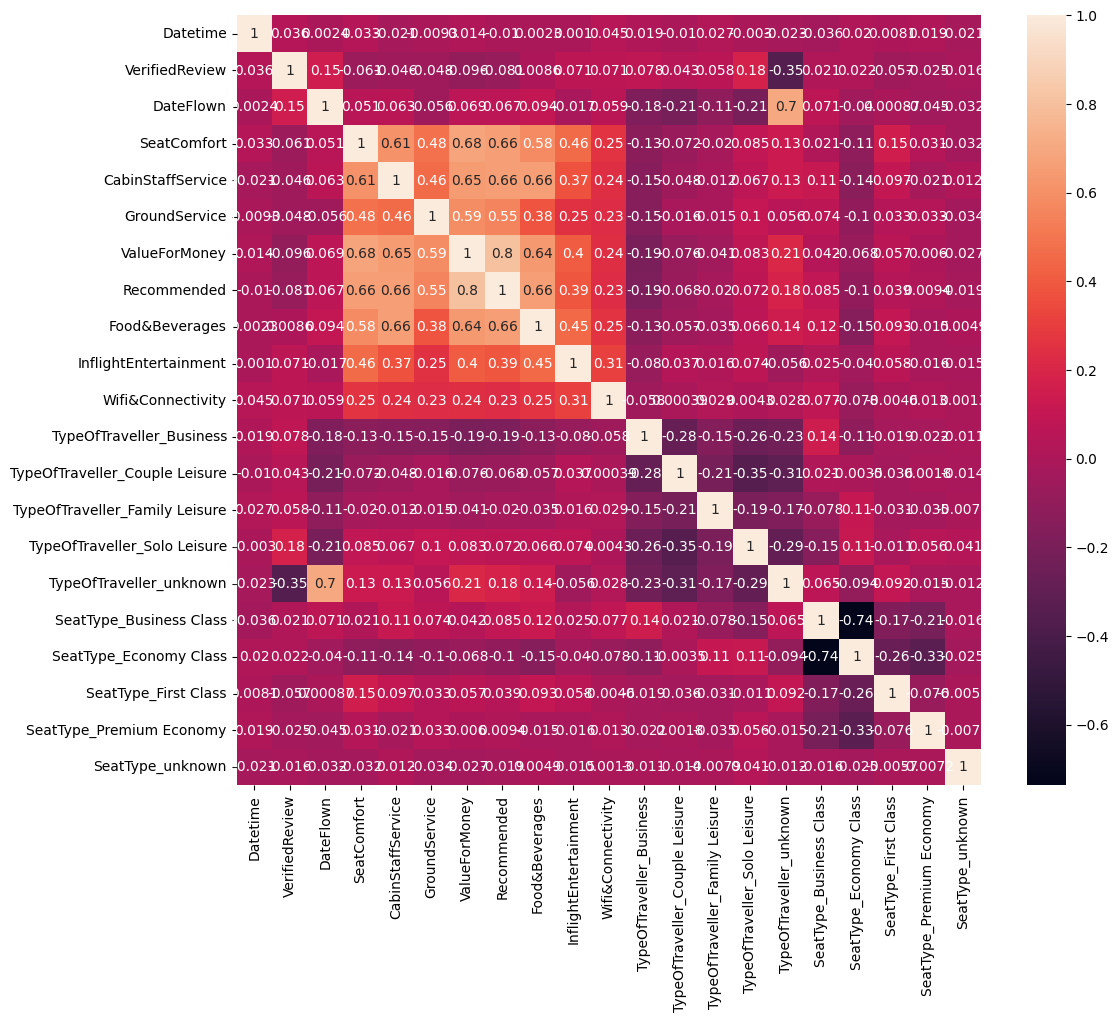

In [1226]:
correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [1227]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [1228]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


In [1229]:
# pca = PCA(n_components=0.95)
# pca.fit(x_train)
# PCA_X_train = pca.transform(x_train)
# PCA_X_test = pca.transform(x_test)

# Model TF

In [1230]:
import tensorflow as tf
import matplotlib.pyplot as plt

class PerceptronModel:
    def __init__(self, input_shape, learning_rate=0.001, activation_function='sigmoid'):
        self.input_shape = input_shape
        # self.learning_rate = learning_rate
        self.activation_function = activation_function

        # Set random seed for reproducibility
        tf.random.set_seed(42)


        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(64, input_shape=[self.input_shape], activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        self.model.add(tf.keras.layers.BatchNormalization())
        self.model.add(tf.keras.layers.Dropout(0.5))
        self.model.add(tf.keras.layers.Dense(32, activation=self.activation_function, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        self.model.add(tf.keras.layers.BatchNormalization())
        self.model.add(tf.keras.layers.Dropout(0.5))
        self.model.add(tf.keras.layers.Dense(10, activation='softmax'))

        # Compile the model
        self.learning_rate = learning_rate
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(self.learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, x_train, y_train, x_val=None, y_val=None, epochs=100, batch_size=32, callback=None):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

        if x_val is not None and y_val is not None:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping, callback] if callback is not None else [early_stopping])
        else:
            history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, callback] if callback is not None else [early_stopping])

        return history

    def set_loss_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))

        history = LossHistoryCallback()
        return history

    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]

    def plot_loss_history(self, losses):
        plt.plot(losses)
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def plot_accuracy_history(self, accuracies):
        plt.plot(accuracies)
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()


    def summary(self):
        # Display the model summary
        self.model.summary()

    def set_loss_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []
                self.accuracies = []
                self.val_losses = []
                self.val_accuracies = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))
                self.accuracies.append(logs.get('accuracy'))
                self.val_losses.append(logs.get('val_loss'))
                self.val_accuracies.append(logs.get('val_accuracy'))

        history = LossHistoryCallback()
        return history

    def plot_loss_history(self, losses, val_losses=None):
        plt.plot(losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def plot_accuracy_history(self, accuracies, val_accuracies=None):
        plt.plot(accuracies, label='Training Accuracy')
        if val_accuracies is not None:
            plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy History')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


    def summary(self):
        # Display the model summary
        self.model.summary()

Epoch 1/100


58/58 [==============================] - 1s 6ms/step - loss: 3.5763 - accuracy: 0.1784 - val_loss: 2.9854 - val_accuracy: 0.0864
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 3.0007 - accuracy: 0.2703 - val_loss: 2.7318 - val_accuracy: 0.2993
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 2.7321 - accuracy: 0.2778 - val_loss: 2.5065 - val_accuracy: 0.3701
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 2.5516 - accuracy: 0.3141 - val_loss: 2.3340 - val_accuracy: 0.3787
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 2.4207 - accuracy: 0.3351 - val_loss: 2.1931 - val_accuracy: 0.3793
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 2.3419 - accuracy: 0.3216 - val_loss: 2.0892 - val_accuracy: 0.3847
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 2.2941 - accuracy: 0.3211 - val_loss: 2.0181 - val_accuracy: 0.3868
Epoch 8/100
58/58 [======

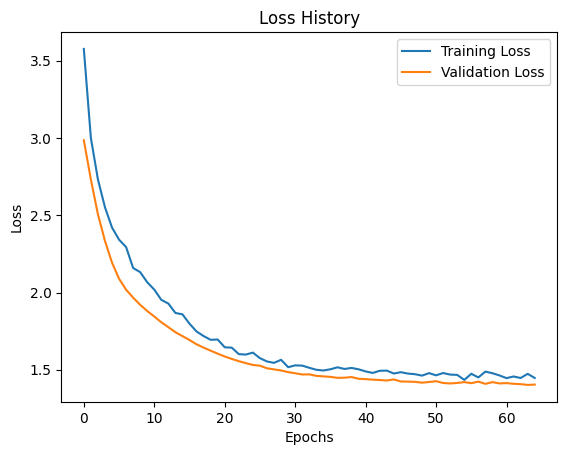

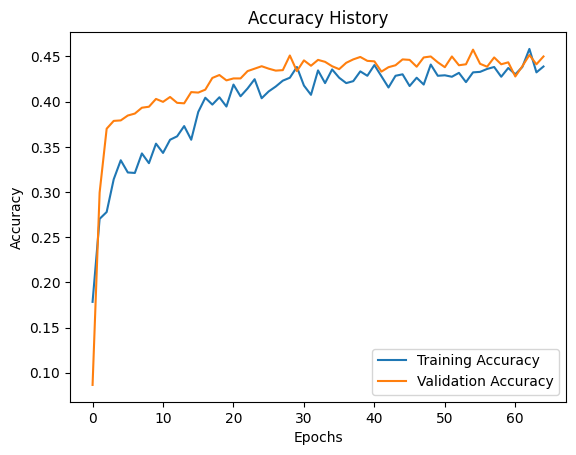

58/58 [==============================] - 0s 940us/step - loss: 1.3586 - accuracy: 0.4741

Test Accuracy	: 0.4575904905796051
Train Accuracy	: 0.4740540683269501


In [1231]:
first = PerceptronModel(x_train.shape[1], learning_rate=0.001, activation_function='sigmoid')

history = first.set_loss_history()
first.train(x_train, y_train, epochs=100, callback=history, x_val=x_test, y_val=y_test, batch_size=32)

first.plot_loss_history(history.losses, history.val_losses)
first.plot_accuracy_history(history.accuracies, history.val_accuracies)
print(f'\nTest Accuracy\t: {first.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {first.get_accuracy(x_train, y_train)}')

In [1232]:
# model = tf.keras.models.Sequential()
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# #input layer
# model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(PCA_X_train.shape[1],)))

# #hidden layers
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(50, activation='relu'))

# #output layer
# model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [1233]:
# model.fit(PCA_X_train, y_train, epochs=100, batch_size=32)

In [1234]:
# model.evaluate(PCA_X_test, y_test)

# Model Sklearn

In [1235]:
# mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
# mlp.fit(PCA_X_train, y_train)

In [1236]:
# print('Accuracy')
# print(mlp.score(PCA_X_test, y_test))

# # draw the confusion matrix
# predict = mlp.predict(PCA_X_test)

# confusion_matrix = confusion_matrix(y_test, predict)
# fig, ax = plt.subplots(1)
# ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
# plt.ylabel('True value')
# plt.xlabel('Predicted value')
# plt.show()